## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style="color: dark pink">Data Load: Load program data into a dataframe</h2> 

In [2]:
df1 = pd.read_csv("datasetprogram.csv")
df1.head()

,store_type,availability,location,rating,society,total_sqft,employees,programs,programs_val,Dpmo
0,Drug Store,Ready To Move,Hoysalanagar,3,NaN,7650,1,3P,1,12
1,Super Market,19-Sep,Sarjapur Road,3,Prtates,25625,28,IHS,2,97
2,Drug Store,18-May,Ashwath Nagar,3,Prldsum,21250,1,Locker,3,79
3,Super Market,43879,Bisuvanahalli,3,Baanise,36275,35,Locker,3,20
4,Super Market,Ready To Move,Dasanapura,2,JRrnauv,32250,7,IHS,2,12


In [3]:
df1.shape 

(12949, 10)

In [4]:
df1.columns

Index(['store_type', 'availability', 'location', 'rating  ', 'society',
       'total_sqft', 'employees ', 'programs', 'programs_val', 'Dpmo'],
      dtype='object')

In [5]:
df1['store_type'].unique()

array(['Drug Store', 'Super Market', 'General Store', 'store_type',
       'Gas Station'], dtype=object)

In [6]:
df1['store_type'].value_counts()

Super Market     8546
General Store    2348
Drug Store       1971
Gas Station        83
store_type          1
Name: store_type, dtype: int64

<h2 style="color: dark pink"> Data Cleaning : Drop features that are not required to build our model</h2> 

In [7]:
df2 = df1.drop(['store_type','society','availability'],axis='columns')
df2.shape

(12949, 7)

In [8]:
df2.isnull().sum()

location         1
rating          16
total_sqft       0
employees        0
programs         0
programs_val     0
Dpmo             0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location        0
rating          0
total_sqft      0
employees       0
programs        0
programs_val    0
Dpmo            0
dtype: int64

In [10]:
df3.shape

(12932, 7)

In [11]:
df3['total_sqft'].unique()

array(['7650', '25625', '21250', ..., '63925', '35725', '148100'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,rating,total_sqft,employees,programs,programs_val,Dpmo
37,Hosakerehalli,5,#VALUE!,27,Locker,3,87
76,Upadhyaya Layout,3,#VALUE!,44,IHS,2,50
120,Kadugodi,2,#VALUE!,21,Locker,3,55
147,Rachenahalli,2,#VALUE!,25,3P,1,11
150,Amruthnagar,2,#VALUE!,46,3P,1,58


In [14]:
df3['employees '].unique()

array([  1,  28,  35,   7,   9,  19,  48,  14,   4,   0,   2,  27,  32,
        47,   6,  23,  37,  46,  45,  42,  15,  20,   8,  34,  13,  18,
        16,   3,  43,  41,   5,  11,  10,  24,  26,  44,  17,  12,  31,
        39,  40,  25,  29,  21,  36,  33,  22,  30,  38,  49, 390],
      dtype=int64)

### Remove all the values that are not numeric from total_sqft 

In [15]:
df3.drop(df3[~df3['total_sqft'] .apply(is_float)].index, inplace = True)

C:\Users\Attri\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,rating,total_sqft,employees,programs,programs_val,Dpmo


In [17]:
df3[~df3['employees '].apply(is_float)].head()

,location,rating,total_sqft,employees,programs,programs_val,Dpmo


In [18]:
df3.shape

(12692, 7)

In [19]:
df3['rating  '].unique()

array(['3', '2', '1', '5', '4', '7', '8', '6', '9', '10', '11', '1 RK',
       '43', '27', '18', '12', '16', '19', '13'], dtype=object)

In [20]:
df1['rating  '].value_counts()

2       5380
3       4713
4       1375
1        625
5        348
6        217
7         99
8         86
9         53
10        14
1 RK      11
11         4
19         1
43         1
16         1
27         1
14         1
18         1
12         1
13         1
Name: rating  , dtype: int64

In [21]:
rating_stats = df3['rating  '].value_counts(ascending=False)
rating_stats

2       5278
3       4629
4       1350
1        611
5        340
6        212
7         99
8         85
9         52
10        14
1 RK      11
11         4
19         1
43         1
16         1
27         1
18         1
12         1
13         1
Name: rating  , dtype: int64

In [22]:
rating_stats_greater_than_5 = rating_stats[rating_stats<215]
rating_stats_greater_than_5

6       212
7        99
8        85
9        52
10       14
1 RK     11
11        4
19        1
43        1
16        1
27        1
18        1
12        1
13        1
Name: rating  , dtype: int64

In [23]:
 df3['rating  '] =  df3['rating  '].apply(lambda x: '5' if x in rating_stats_greater_than_5 else x)
len( df3['rating  '].unique())

C:\Users\Attri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5

In [24]:
df1['rating  '].value_counts()

2       5380
3       4713
4       1375
1        625
5        348
6        217
7         99
8         86
9         53
10        14
1 RK      11
11         4
19         1
43         1
16         1
27         1
14         1
18         1
12         1
13         1
Name: rating  , dtype: int64

In [25]:
df3.head(10)

,location,rating,total_sqft,employees,programs,programs_val,Dpmo
0,Hoysalanagar,3,7650,1,3P,1,12
1,Sarjapur Road,3,25625,28,IHS,2,97
2,Ashwath Nagar,3,21250,1,Locker,3,79
3,Bisuvanahalli,3,36275,35,Locker,3,20
4,Dasanapura,2,32250,7,IHS,2,12
5,Panathur,2,31750,9,3P,1,44
6,Raja Rajeshwari Nagar,2,27750,19,IHS,2,72
7,Bidrahalli,1,10836,48,Locker,3,1
8,Seegehalli,3,6750,14,3P,1,74
9,Hennur,2,58025,4,3P,1,12


In [26]:
rating_stats_greater_than_5

6       212
7        99
8        85
9        52
10       14
1 RK     11
11        4
19        1
43        1
16        1
27        1
18        1
12        1
13        1
Name: rating  , dtype: int64

In [27]:
#df3.drop(df3[df3['rating'] >5].index, inplace = True) error d

<h2 style="color:blue"><h2 style="color: dark pink"> Feature Engineering</h2>

In [28]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     12692
unique     2573
top       12000
freq        505
Name: total_sqft, dtype: object

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [29]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

C:\Users\Attri\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Whitefield                  512
Sarjapur  Road              378
Electronic City             290
Kanakpura Road              263
Thanisandra                 227
                           ... 
6th Block Jayanagar           1
Vinayaka Layout               1
Off Bannergatta Road          1
Doctor Layout Rayasandra      1
1 Immadihalli                 1
Name: location, Length: 1273, dtype: int64

In [30]:
location_stats.values.sum()

12692

#### Drop all the locations less than 10 and merge to a location other

In [31]:
len(location_stats[location_stats>10])

233

In [32]:
len(location_stats)

1273

In [33]:
len(location_stats[location_stats<=10])

1040

<h2 style="color:pink">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [34]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Narayanapura                 10
2nd Phase Judicial Layout    10
Tindlu                       10
Nehru Nagar                  10
Dairy Circle                 10
                             ..
6th Block Jayanagar           1
Vinayaka Layout               1
Off Bannergatta Road          1
Doctor Layout Rayasandra      1
1 Immadihalli                 1
Name: location, Length: 1040, dtype: int64

In [35]:
len(df3.location.unique())

1273

In [36]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

234

In [37]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

234

In [38]:
df3.head(10)

,location,rating,total_sqft,employees,programs,programs_val,Dpmo
0,other,3,7650,1,3P,1,12
1,Sarjapur Road,3,25625,28,IHS,2,97
2,other,3,21250,1,Locker,3,79
3,Bisuvanahalli,3,36275,35,Locker,3,20
4,Dasanapura,2,32250,7,IHS,2,12
5,Panathur,2,31750,9,3P,1,44
6,Raja Rajeshwari Nagar,2,27750,19,IHS,2,72
7,other,1,10836,48,Locker,3,1
8,Seegehalli,3,6750,14,3P,1,74
9,Hennur,2,58025,4,3P,1,12


In [39]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     12692
unique     2573
top       12000
freq        505
Name: total_sqft, dtype: object

In [40]:
df3.shape

(12692, 7)

<h2 style='color:pink'>Outlier Removal Using Rating Feature</h2>

In [41]:
df4 = df3.copy()

In [42]:
df4['rating  '].unique()

array(['3', '2', '1', '5', '4'], dtype=object)

Text(0, 0.5, 'Count')

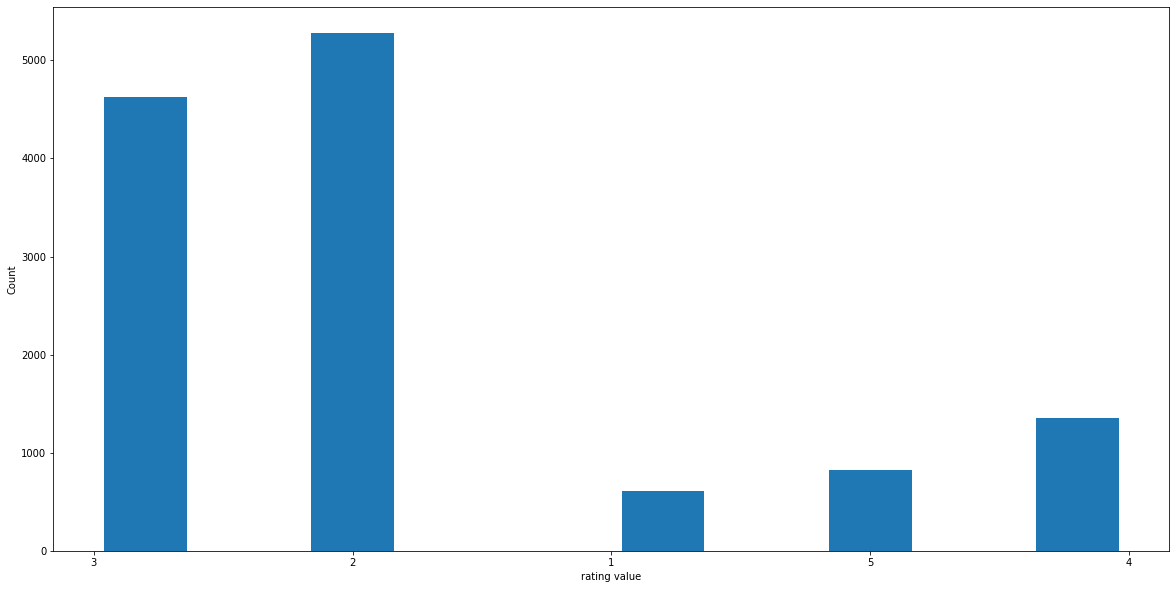

In [43]:
plt.hist(df4['rating  '],rwidth=0.8)
plt.xlabel("rating value")
plt.ylabel("Count")

In [44]:
df4.columns

Index(['location', 'rating  ', 'total_sqft', 'employees ', 'programs',
       'programs_val', 'Dpmo'],
      dtype='object')

Text(0, 0.5, 'Count')

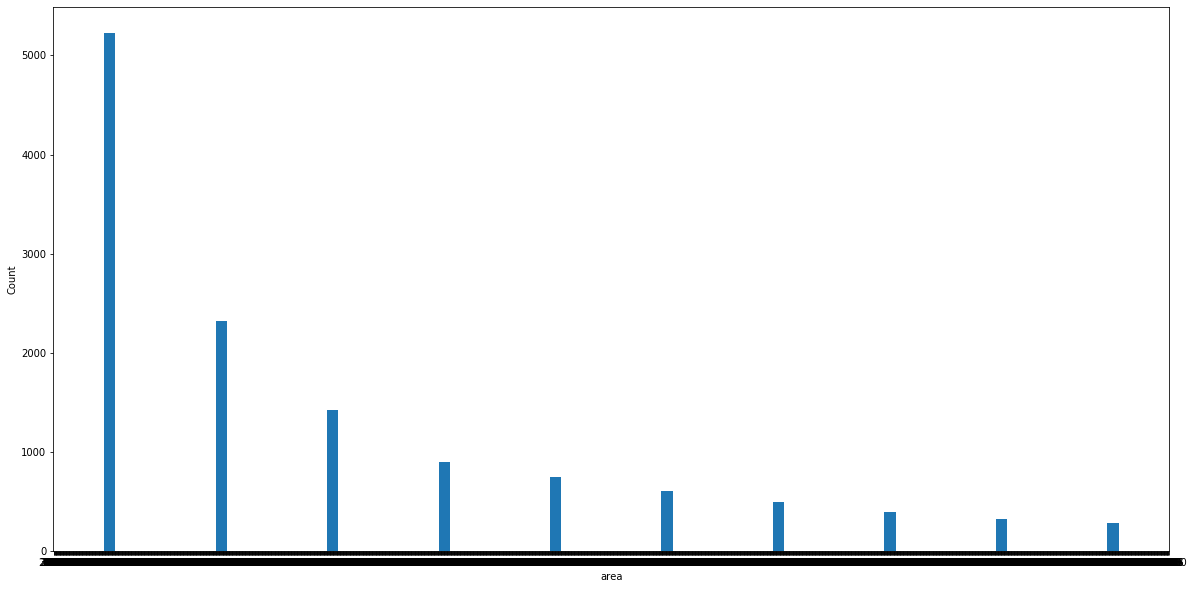

In [45]:
plt.hist(df4['total_sqft'],rwidth=0.1)
plt.xlabel("area")
plt.ylabel("Count")

<h2 style='color:pink'>Use One Hot Encoding For Location</h2>

<h3 style='color:'>ML algo doesn't work with char so do hot encoding to convert it into numerical</h2>

In [46]:
dummies = pd.get_dummies(df4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df4 = pd.concat([df4,dummies],axis='columns')
df4.head()

,location,rating,total_sqft,employees,programs,programs_val,Dpmo,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,other,3,7650,1,3P,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sarjapur Road,3,25625,28,IHS,2,97,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,3,21250,1,Locker,3,79,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Bisuvanahalli,3,36275,35,Locker,3,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dasanapura,2,32250,7,IHS,2,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df5 = df4.drop('location',axis='columns')
df5.head(2)

,rating,total_sqft,employees,programs,programs_val,Dpmo,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,7650,1,3P,1,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,25625,28,IHS,2,97,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'programs', 'programs_val',
       'Dpmo', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=240)

<h2 style='color:pink'>Build a Model Now...</h2>

In [50]:
df5.shape

(12692, 240)

In [51]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'programs', 'programs_val',
       'Dpmo', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=240)

In [52]:
X = df5.drop(['programs'],axis='columns')
X.head(3)

,rating,total_sqft,employees,programs_val,Dpmo,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,7650,1,1,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,25625,28,2,97,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,21250,1,3,79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
X.shape

(12692, 239)

In [54]:
y = df5.programs_val
y.head()

0    1
1    2
2    3
3    3
4    2
Name: programs_val, dtype: int64

In [55]:
len(y)

12692

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
model.score(X_test, y_test)


0.4407246947617172

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

1.0

<h2 style='color:Green'>...Naive Bayes Classifier...</h2>

In [63]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [64]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [65]:
clf.score(X_test, y_test)

0.430484442693974

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [67]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
rfclf.score(X_test, y_test)

0.7959826703426546

<h2 style='color:Green'>...Logistic Regression Classifier...</h2>

In [69]:
from sklearn.linear_model import LogisticRegressionCV
lrclf = LogisticRegressionCV(cv=5, random_state=0)
lrclf.fit(X_train, y_train)

C:\Users\Attri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Attri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [70]:
rfclf.score(X_test, y_test)

0.7959826703426546

<h2 style='color:Green'>...Random Forest Classifier...</h2>

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [72]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_test, y_test)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
rfclf.score(X_test, y_test)

0.8050413548641198

## Use K Fold cross validation to measure accuracy of our Random Forest model

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier() ,X_test, y_test, cv=cv)

array([1., 1., 1., 1., 1.])

In [75]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'programs', 'programs_val',
       'Dpmo', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=240)

In [76]:
def predict_program(location,rating,employees,total_sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = rating
    x[1] = total_sqft
    x[2] = employees
    if loc_index >= 0:
        x[loc_index] = 1

    return rfclf.predict([x])[0]

`x_train`, `x_test`: training and test feature matrices of size `(n_samples, n_features)`
`y_train`, `y_test`: training and test label matrices of size `(n_samples, n_labels)`

In [77]:
predict_program('Indira Nagar',1000, 3, 3)

2

<h2 style='color:pink'>Export the tested model to a pickle file</h2>

In [78]:
import pickle
with open('program_prediction.pickle','wb') as f:
    pickle.dump(rfclf,f)

In [79]:
with open('program_prediction.pickle','rb') as f:
    mp=pickle.load(f)

<h2 style='color:pink'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [80]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))